In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [14]:
model = RandomForestRegressor(n_estimators=100, criterion='friedman_mse', max_depth=None, min_samples_split=2,
                                      min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0,
                                      max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
                                      n_jobs=None, random_state=1, verbose=0, warm_start=False, ccp_alpha=0.0,
                                      max_samples=None)

In [45]:
path = '/home/tigem/a.valente/EvolvePro/TEST/output/GPR68_pH55_ESM2_650M/REPL1/Round10/iteration.csv'
path2 = '/home/tigem/a.valente/EvolvePro/TEST/output/GPR68_pH55_ESM2_650M/REPL1/Round10/df_sorted_all.csv'
path3 = '/home/tigem/a.valente/EvolvePro/TEST/embeddings/GPR68_esm2_650M_pH55_filtered.csv'

embd = pd.read_csv(path3, index_col=0)
all_var = pd.read_csv(path2, index_col=0)
iteration = pd.read_csv(path, index_col=0)

b = all_var[all_var['variant'].isin(iteration['variant'])].copy()
a = embd[embd.index.isin(iteration['variant'])].copy()


y_train = b['y_actual'].values
X_train = a.loc[b['variant']]

In [36]:
y_train.head()

,variant,y_pred,y_actual,y_actual_scaled,y_actual_binary,dist_metric,std_predictions
0,F348Q,1.864868,2.761672,1.000000,1.0,0.035630,0.0
1,T350P,1.439522,2.230585,0.884798,1.0,0.028470,0.0
2,D7Q,1.347159,2.206008,0.879467,1.0,0.029794,0.0
3,E160R,1.145116,1.330167,0.689482,1.0,0.041655,0.0
4,F359P,0.942922,1.507415,0.727930,1.0,0.029261,0.0


In [48]:
y_train

array([ 2.76167196,  2.23058485,  2.20600821,  1.33016709,  1.50741481,
        1.13828531,  0.98142618,  0.98609903,  0.92177643,  0.83269457,
        1.02839781,  1.16563413,  0.97353333,  0.95740787,  0.91682935,
        0.77914441,  1.052881  ,  0.86599328,  0.85763636,  0.70903727,
        0.53889012,  0.59153183,  0.51504685,  0.50083688,  0.49671211,
        0.65391458,  0.20666713,  0.47562364,  0.2311561 ,  0.3916278 ,
        0.16879795,  0.25265044,  0.29583271,  0.31109324,  0.11713961,
        0.21130362,  0.19724527,  0.09943623,  0.24445219,  0.15714337,
        0.12352317,  0.1366355 ,  0.21119136,  0.27770772,  0.14929013,
       -0.00890545, -0.03080421,  0.10651977,  0.11907371, -0.08708408,
       -0.05246509, -0.00443388, -0.06422804,  0.01742445, -0.06992552,
       -0.0944315 , -0.21111192, -0.11103259, -0.15366619,  0.01313399,
       -0.22249952, -0.37392693, -0.1331776 , -0.25254419, -0.29829904,
       -0.69855444, -0.62977889, -0.153242  , -0.46147501, -0.29

In [42]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
F348Q,-0.005639,-0.047477,-0.049066,0.071633,-0.005148,-0.055987,0.124612,0.071798,0.107267,0.120965,...,-0.020793,0.023378,-0.307113,0.091176,-0.065933,0.047377,-0.016050,-0.088850,-0.060296,0.110501
T350P,-0.002737,-0.044559,-0.049399,0.071770,-0.005562,-0.052659,0.125515,0.078224,0.110528,0.119850,...,-0.021052,0.026178,-0.307614,0.093951,-0.063999,0.049613,-0.015941,-0.089402,-0.064546,0.111743
D7Q,-0.002219,-0.045734,-0.049487,0.073669,-0.005217,-0.054390,0.126635,0.077558,0.111478,0.120047,...,-0.021959,0.026486,-0.309994,0.095418,-0.064246,0.051279,-0.016590,-0.089865,-0.066051,0.110275
E160R,-0.005970,-0.046836,-0.049159,0.073715,-0.006373,-0.051629,0.127159,0.077642,0.110036,0.120576,...,-0.021088,0.026120,-0.307728,0.097832,-0.066342,0.051567,-0.016178,-0.089290,-0.064460,0.110248
F359P,-0.005226,-0.045774,-0.049597,0.071020,-0.005706,-0.054656,0.123429,0.074334,0.108525,0.120149,...,-0.019752,0.025195,-0.306470,0.092849,-0.064852,0.048496,-0.017745,-0.089557,-0.061327,0.110260


In [49]:
RF_regressor = model.fit(X_train, y_train)

In [50]:
RF_regressor

RandomForestRegressor(criterion='friedman_mse', random_state=1)

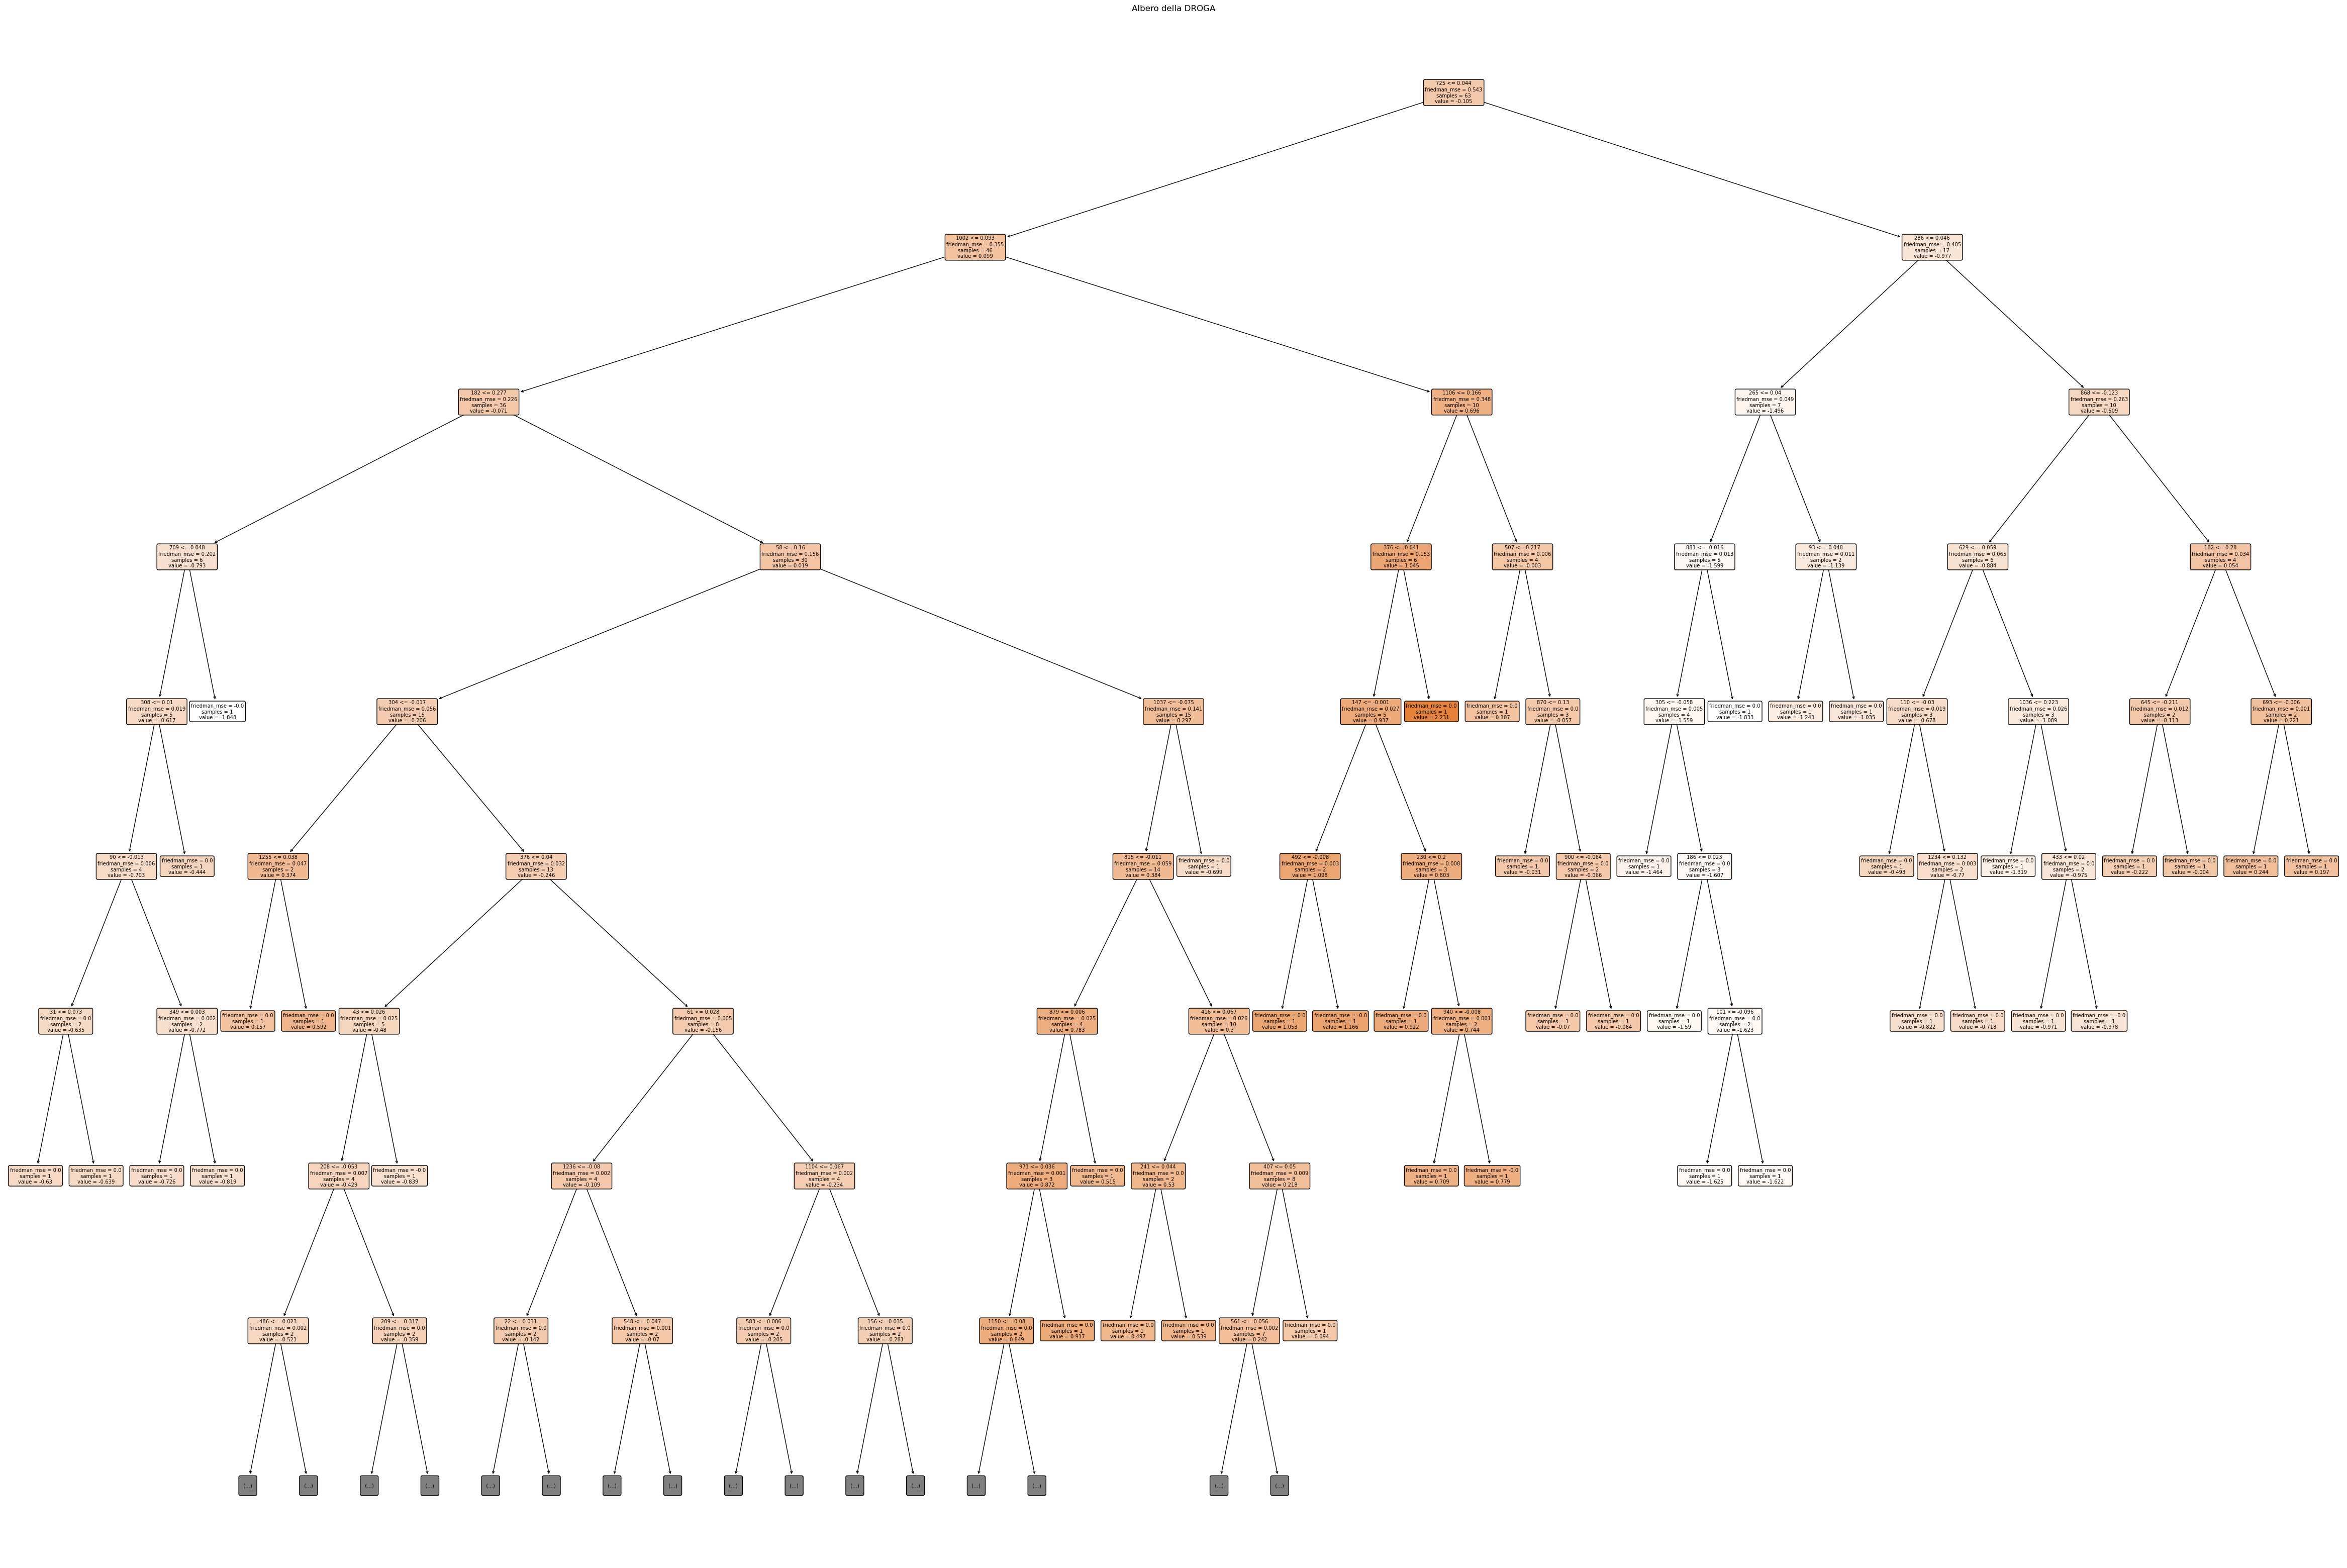

In [56]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# rf_regressor = il tuo modello RF già allenato
# embeddings = il DataFrame con gli embedding (X_train)
# tree = primo albero della RF
tree = RF_regressor.estimators_[1]

plt.figure(figsize=(60, 40))

plot_tree(
    tree,
    feature_names=X_train.columns,  # i nomi delle colonne dei tuoi embedding
    filled=True,                       # colori per i nodi
    rounded=True,                      # nodi stondati
    max_depth=8                        # opzionale, limita la profondità per leggibilità
)

plt.title("Albero della DROGA")
plt.show()  # se vuoi solo printarlo, puoi anche omettere
